## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

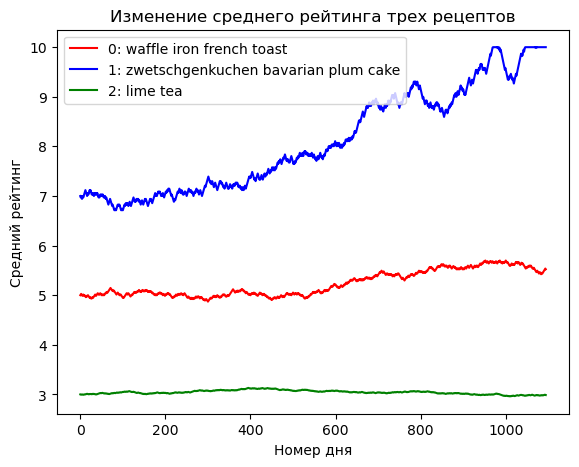

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
data=np.load('average_ratings.npy')
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])

y1line=ax.plot(data[0],'r',label='0: waffle iron french toast')
y2line=ax.plot(data[1],'b',label='1: zwetschgenkuchen bavarian plum cake')
y3line=ax.plot(data[2],'g',label='2: lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.legend(loc='upper left')
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\haund\AppData\Local\Temp\ipykernel_19988\2095806706.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dtrange=pd.date_range('01/01/2019','30/12/2021',freq='D')


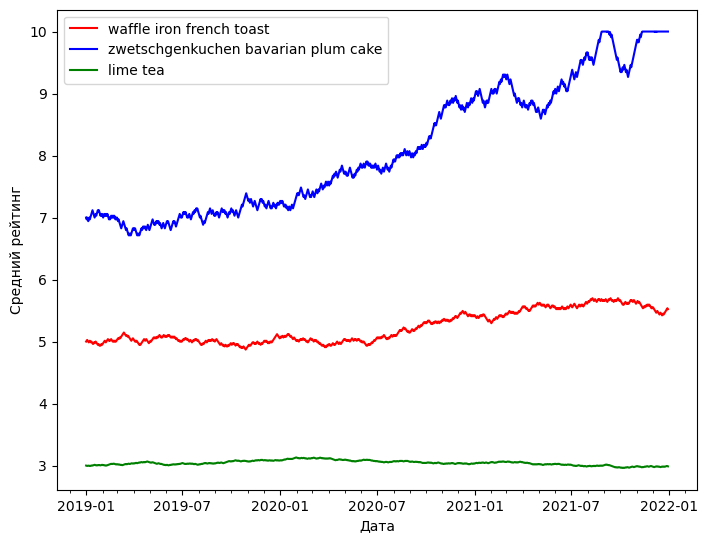

In [133]:
dtrange=pd.date_range('01/01/2019','30/12/2021',freq='D')
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,1,1])
y1line=ax.plot(dtrange,data[0],'r',label='0: waffle iron french toast')
y2line=ax.plot(dtrange,data[1],'b',label='1: zwetschgenkuchen bavarian plum cake')
y3line=ax.plot(dtrange,data[2],'g',label='2: lime tea')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax.legend(loc='upper left')

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

C:\Users\haund\AppData\Local\Temp\ipykernel_19988\212258985.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date = pd.date_range(start = '01.01.2019', end = '30.12.2021', freq = 'D')


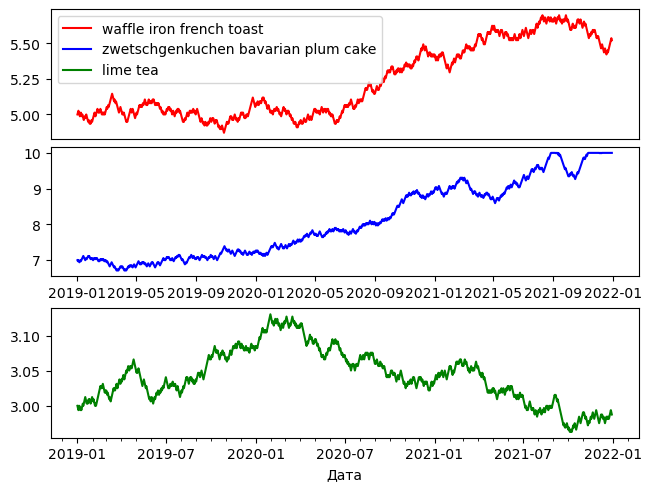

In [159]:
date = pd.date_range(start = '01.01.2019', end = '30.12.2021', freq = 'D')

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,layout='constrained')

y1line,=ax1.plot(dtrange,data[0],'r',label='waffle iron french toast')
y2line,=ax2.plot(dtrange,data[1],'b',label='zwetschgenkuchen bavarian plum cake')
y3line,=ax3.plot(dtrange,data[2],'g',label='lime tea')

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,7)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())

ax1.legend(handles = [y1line,y2line,y3line], loc = 'upper left')
ax3.set_xlabel('Дата')

ax1.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


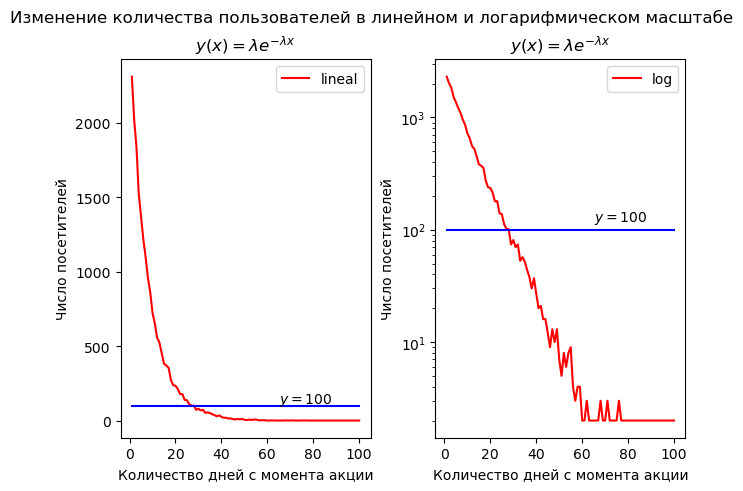

In [207]:
data=np.load('visitors.npy')
days=[day for day in range(1,101,1)]
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,layout='constrained')
y100=100*[100]
ax1.plot(days,data,'r',label='lineal')
ax1.plot(days,y100,'b')
ax2.plot(days,data,'r',label='log')
ax2.plot(days,y100,'b')

ax2.set_yscale('log')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')

ax1.text(65,120,'$y=100$')
ax2.text(65,120,'$y=100$')

ax1.legend()
ax2.legend()

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [215]:
recipes = pd.DataFrame(pd.read_csv('recipes_sample.csv'))
reviews = pd.DataFrame(pd.read_csv('reviews_sample.csv'))

In [260]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [230]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,30000.000000,30000.000000,3.000000e+04,18810.000000,21120.000000
mean,221879.294000,123.358133,5.635901e+06,9.805582,9.008286
std,140974.425354,1660.876602,1.007373e+08,5.944155,3.715213
min,48.000000,0.000000,1.530000e+03,1.000000,1.000000
25%,99713.500000,20.000000,5.596450e+04,6.000000,6.000000
50%,207773.500000,40.000000,1.699690e+05,9.000000,9.000000
75%,333696.750000,65.000000,3.960780e+05,12.000000,11.000000
max,536747.000000,129615.000000,2.002248e+09,88.000000,34.000000


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [234]:
def duration(row):
    if row['minutes']<5:
        return 'короткий'
    elif 5<=row['minutes']<50:
        return 'средний'
    else:
        return 'длинный'
    

recipes['duration']=recipes.apply(lambda row: duration(row),axis=1)
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,длинный
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,средний
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,средний
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,средний
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,средний


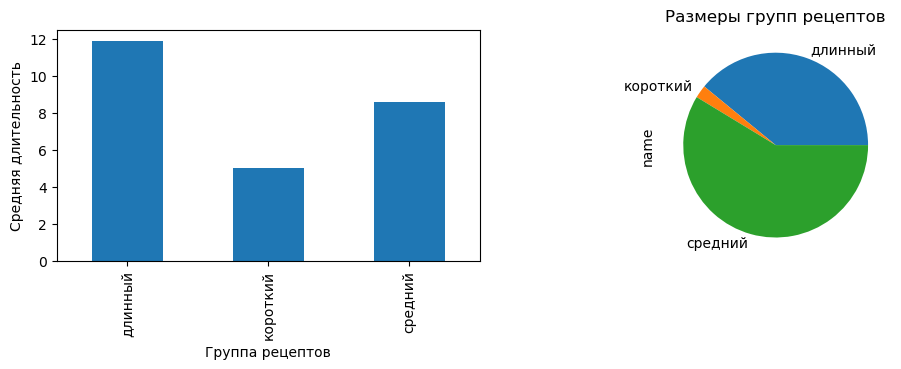

In [259]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(12,3))

recipes.groupby('duration')['n_steps'].mean().plot(kind='bar',ax=ax1)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

recipes.groupby('duration').count().name.plot(kind='pie', ax = ax2)
ax2.set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

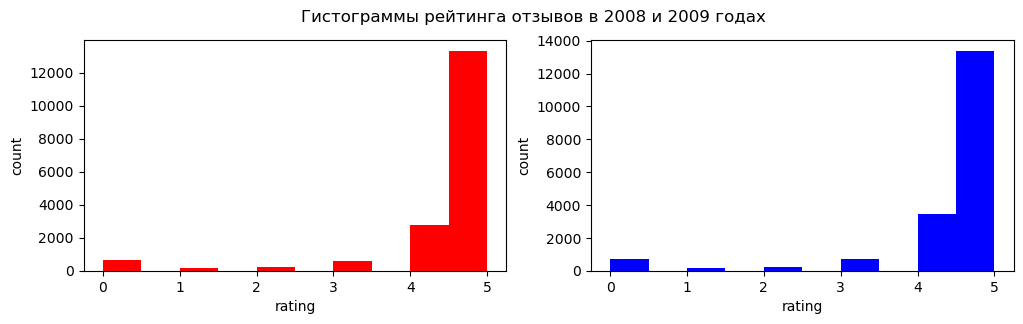

In [307]:
reviews['year']=pd.DatetimeIndex(reviews['date']).year
reviews_2009=reviews.loc[(reviews['year']==2009)]
reviews_2008=reviews.loc[(reviews['year']==2008)]

fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,3))
reviews_2009['rating'].plot.hist(ax=ax1,color='r')
ax1.set_ylabel('count')
ax1.set_xlabel('rating')

reviews_2008['rating'].plot.hist(ax=ax2,color='b')
ax2.set_ylabel('count')
ax2.set_xlabel('rating')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

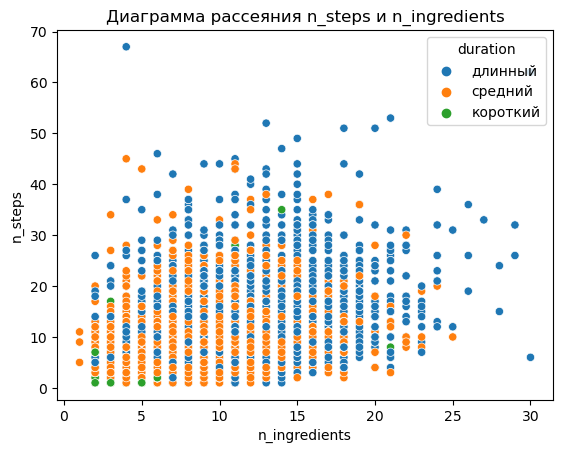

In [311]:
fig=sns.scatterplot(data=recipes,y='n_steps',x='n_ingredients',hue='duration')
fig.set_title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

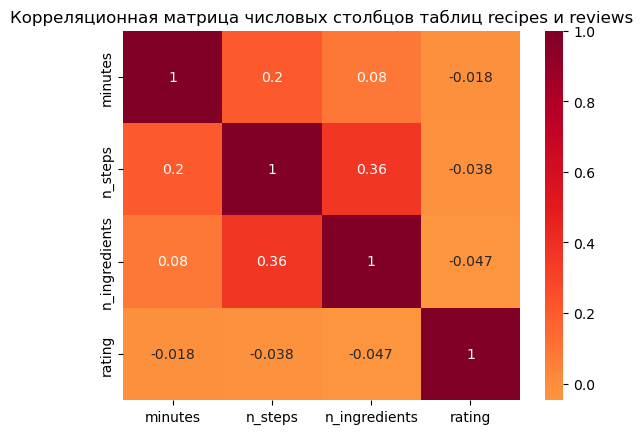

In [330]:
desired_columns=["minutes", "n_steps", "n_ingredients", "rating"]
datan=recipes.merge(reviews,left_on='id',right_on='user_id')[desired_columns]
fig=sns.heatmap(datan.corr(),cmap='YlOrRd',center=0.0,annot=True)
fig.set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')